In [1]:
import urllib.request 
import gzip
import os
import numpy
import matplotlib 
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical
%matplotlib notebook

Using TensorFlow backend.


In [2]:
def load_dataset():
    def download(filename, source = "http://yann.lecun.com/exdb/mnist/"):
        print ("Downloading: ", filename)
        urllib.request.urlretrieve(source+filename, filename)
        
    def load_mnist_images(filename):
        if not os.path.exists(filename):
            download(filename)
            
        with gzip.open(filename, "rb") as f:
            data = numpy.frombuffer(f.read(), numpy.uint8, offset=16)
            data = data.reshape(-1, 1, 28, 28)
        return data/numpy.float32(256)
        
    def load_mnist_labels(filename):
        if not os.path.exists(filename):
            download(filename)
        with gzip.open(filename, "rb") as f: 
            data = numpy.frombuffer(f.read(), numpy.uint8, offset=8)
        return data
    
    train_images = load_mnist_images("train-images-idx3-ubyte.gz")
    train_labels = load_mnist_labels("train-labels-idx1-ubyte.gz")
    test_images = load_mnist_images("t10k-images-idx3-ubyte.gz")
    test_labels = load_mnist_labels("t10k-labels-idx1-ubyte.gz")
    
    return train_images, train_labels, test_images, test_labels

In [3]:
train_images, train_labels, test_images, test_labels = load_dataset()

The label of this image must correspond to one:
1


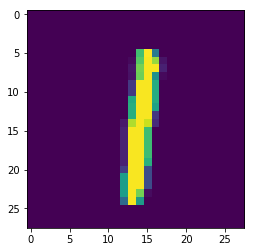

In [5]:
pyplot.figure()
pyplot.imshow(train_images[40][0])
print("The label of this image must correspond to one:")
print(train_labels[40])
assert(train_labels[40] == 1)
pyplot.show()

In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 1, 28, 28)
(60000,)
(10000, 1, 28, 28)
(10000,)


In [7]:
train_images = numpy.reshape(train_images, (60000, 28, 28, 1))
test_images = numpy.reshape(test_images, (10000, 28, 28, 1))

In [8]:
num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1), strides=2, padding='same', activation='relu',),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [9]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [10]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  validation_data=(test_images, to_categorical(test_labels)),
)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.3099 - accuracy: 0.9075 - val_loss: 0.1296 - val_accuracy: 0.9616
Epoch 2/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.1272 - accuracy: 0.9609 - val_loss: 0.1046 - val_accuracy: 0.9670
Epoch 3/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.1024 - accuracy: 0.9688 - val_loss: 0.0917 - val_accuracy: 0.9687
Epoch 4/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0889 - accuracy: 0.9728 - val_loss: 0.0750 - val_accuracy: 0.9753
Epoch 5/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0785 - accuracy: 0.9763 - val_loss: 0.0767 - val_accuracy: 0.9729
Epoch 6/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0712 - accuracy: 0.9774 - val_loss: 0.0729 - val_accuracy: 0.9749
Epoch 7/10
60000/60000 [==============================] - 9s 

In [ ]:
model.save_weights('Handwritten_weights.h5')

In [ ]:
predictions = model.predict(test_images[:10])

In [ ]:
print(numpy.argmax(predictions, axis=1))

In [ ]:
print(test_labels[:10])

In [ ]:
predictions_total = model.predict(test_images)

In [ ]:
test_images[0].shape

In [ ]:
predicted_numbers = numpy.argmax(predictions_total, axis=1)
ground_truth = test_labels

In [ ]:
bad_classified = []
for i, num in enumerate(predicted_numbers):
    if num != ground_truth[i]:
        bad_classified.append(num)

In [ ]:
print(len(bad_classified))
pyplot.figure()
pyplot.hist(bad_classified, bins=10)
pyplot.show()

In [ ]:
from PIL import Image
img = Image.open('seven.png')
im2arr = numpy.reshape(img, (1,28,28,1))
y_pred = model.predict(im2arr)
print(y_pred)